In [2]:
import pandas as pd
import numpy as np


In [3]:
url = "../Data/spambase.csv"
SpamData = pd.read_csv(url)
SpamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


For the dictionary of this dataset pleaserefer to https://archive.ics.uci.edu/ml/datasets/Spambase

In [5]:
ListOfAllVariables = SpamData.columns.values
X = SpamData[ListOfAllVariables]
del X['is_spam']
y = SpamData['is_spam']


In [6]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X,y)
zip(ListOfAllVariables,lm.coef_[0])

[('word_freq_make', -0.32161942488269102),
 ('word_freq_address', -0.15777709056119038),
 ('word_freq_all', 0.14253080671661256),
 ('word_freq_3d', 0.76641593225783045),
 ('word_freq_our', 0.55378737241652376),
 ('word_freq_over', 0.77003421201595657),
 ('word_freq_remove', 2.1819829316847468),
 ('word_freq_internet', 0.57514580008366611),
 ('word_freq_order', 0.68026960051779795),
 ('word_freq_mail', 0.11850797886823047),
 ('word_freq_receive', -0.23207218153490197),
 ('word_freq_will', -0.14319964489278444),
 ('word_freq_people', -0.074722222391711973),
 ('word_freq_report', 0.14519796121951348),
 ('word_freq_addresses', 0.90704393848254783),
 ('word_freq_free', 1.0269103739853798),
 ('word_freq_business', 0.89325072023831886),
 ('word_freq_email', 0.12597858586140814),
 ('word_freq_you', 0.074622993870820581),
 ('word_freq_credit', 0.96079581470502029),
 ('word_freq_your', 0.24448373145559232),
 ('word_freq_font', 0.27694354886907574),
 ('word_freq_000', 2.1945048792552999),
 ('word

In [5]:
from sklearn.cross_validation import cross_val_score
print(cross_val_score(lm,X,y,cv=10).mean()) 
MisClassificationError = 1 - (cross_val_score(lm,X,y,cv=10).mean())
print(MisClassificationError)  #our misclassification Error is not bad!

0.917161846536
0.0828381534638


In [6]:
SpamData['is_spam'].describe()  #We love misclassification error even more! (39%) of e-mails were spam

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_spam, dtype: float64

In [9]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X)
cmat = confusion_matrix(y, y_hat)
cmat

array([[2662,  126],
       [ 186, 1627]])

#### How much is our FPR, TPR, TNR, FNR? 

In [10]:
#Answer


#### How much is our current intercept?

In [11]:
lm.intercept_

array([-1.44908325])

#### In our current setting 39% of our data was Spam. How would you adjust your model if you knew that in reality only 10% of e-mails are spam?

Answer: 

In [ ]:
I would 

In [14]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X).T[1]  #T[1] returns probability of belonging to class
print(y_hat_probability)
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)  #an excellent value!

[ 0.20459315  0.27568037  0.43316045 ...,  0.17063219  0.17758295
  0.18120549]
0.966309002177


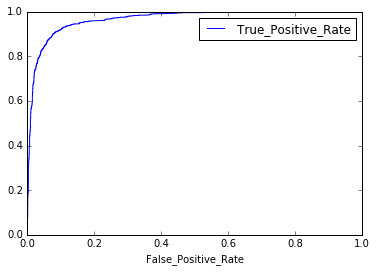

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #beautiful Graph


#### Now let's find out the most important variables
Use Lasso equiv for logistics. Standardize. 

Default in python is Ridge regression b/c of computational need, but Lasso is preferable.

In [21]:
# let's first standardize our data
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

NameOfVariables = X.columns.values
for i in NameOfVariables:
    SpamData[i] = Standardize(SpamData[i])
X = SpamData[ListOfAllVariables]
del X['is_spam']  

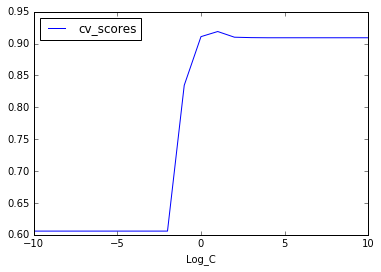

In [25]:
from sklearn.cross_validation import cross_val_score

# Try testing and plot
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,penalty = "l1") # Penalty needed for Lasso
    cv_scores.append(cross_val_score(lm,X,y,cv=10).mean())


C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )
# Probably want to use zero for C

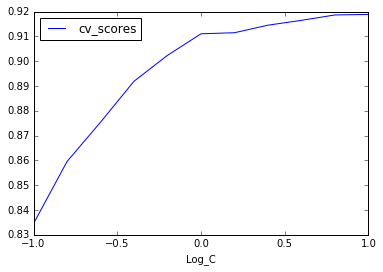

In [26]:
# Try testing and plot
c_list = np.logspace(-1,1,11) 
c_index = np.linspace(-1,1,11)
#C is just the inverse of Lambda - the smaller the C - the stronger the
#regulatization. The smaller C's choose less variables
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score, penalty = "l1")
    cv_scores.append(cross_val_score(lm,X,y,cv=10).mean())


C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )
# it sounds like we can choose C = 0 - C =1 is actually better but we would like to keep the smallest C that is
# good in comparison to our best possible outcome. The SIMPLER THE BETTER! SMALLER C's GIVE YOU MORE RESTRICTIVE
# OUTPUTS - BETTER INTERPRETATION

In [34]:
lm = LogisticRegression(C = 10**(0), penalty = "l1")
lm.fit(X,y)
NameOfVariables,lm.coef_[0]


(array(['word_freq_make', 'word_freq_address', 'word_freq_all',
        'word_freq_3d', 'word_freq_our', 'word_freq_over',
        'word_freq_remove', 'word_freq_internet', 'word_freq_order',
        'word_freq_mail', 'word_freq_receive', 'word_freq_will',
        'word_freq_people', 'word_freq_report', 'word_freq_addresses',
        'word_freq_free', 'word_freq_business', 'word_freq_email',
        'word_freq_you', 'word_freq_credit', 'word_freq_your',
        'word_freq_font', 'word_freq_000', 'word_freq_money',
        'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
        'word_freq_650', 'word_freq_lab', 'word_freq_labs',
        'word_freq_telnet', 'word_freq_857', 'word_freq_data',
        'word_freq_415', 'word_freq_85', 'word_freq_technology',
        'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
        'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
        'word_freq_original', 'word_freq_project', 'word_freq_re',
        'word_freq_edu', 'word_freq_ta

## Var_coef = zip(lm.coef_[0,:],NameOfVariables)
Var_coef

In [16]:
sorted(Var_coef)

[(-28.733212277055699, 'word_freq_george'),
 (-27.780194101847066, 'word_freq_hp'),
 (-15.232647128520181, 'word_freq_edu'),
 (-11.852830743965953, 'word_freq_meeting'),
 (-9.6903109096320179, 'word_freq_re'),
 (-6.7707207797535487, 'word_freq_hpl'),
 (-5.7393742306965967, 'word_freq_data'),
 (-3.9627214871065628, 'word_freq_project'),
 (-3.3668268303026361, 'word_freq_cs'),
 (-3.3230718335561313, 'char_freq_;'),
 (-1.8641317304097049, 'word_freq_conference'),
 (-1.5537526330733111, 'word_freq_pm'),
 (-1.4224805890714847, 'word_freq_table'),
 (-1.3714837327629834, 'word_freq_original'),
 (-1.2383773101915796, 'word_freq_will'),
 (-1.137028241853729, 'word_freq_address'),
 (-0.86033424296667915, 'word_freq_1999'),
 (-0.62842989447332442, 'word_freq_labs'),
 (-0.53577533961266, 'word_freq_make'),
 (-0.4901777261802604, 'word_freq_lab'),
 (0.0, 'capital_run_length_longest'),
 (0.0, 'char_freq_#'),
 (0.0, 'char_freq_('),
 (0.0, 'char_freq_['),
 (0.0, 'word_freq_415'),
 (0.0, 'word_freq_85'

It seems like char_freq_$ has the highest effect on an email be a spam, the next word that highly affects the probability of spam is remove, followed by  free, 000, b !, etc.

The most unlikely characters that are in spam emails are george, hp, edu, meeting, etc.. 

12 words  and characters - with coefficients 0 - have mixed effect on probability of spam and ham. 

#### Now let's look at ROC, AUC, confusion matrix of our optimal model

In [30]:
y_hat = lm.predict(X)
confusion_matrix(y, y_hat)

array([[2666,  122],
       [ 262, 1551]])

[ 0.48494993  0.94171082  0.99798188 ...,  0.09795319  0.17408751
  0.10086071]
0.970620581786


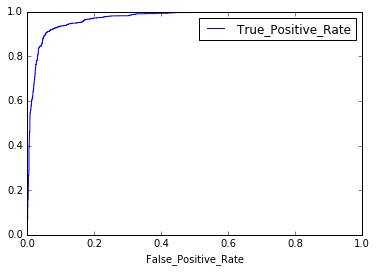

In [31]:
y_hat_probability = lm.predict_proba(X).T[1]  #T[1] returns probability of belonging to class
print(y_hat_probability)
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #agian beautiful Graph

#### Now let's play with threshold

In [33]:
def PredictThreshold(Predictprob,Threshhold):
    y_predict = 0
    if (Predictprob >= Threshhold):
        y_predict = 1
    return y_predict

PredictThreshold(0.5,0.9)
y_hat_probability = lm.predict_proba(X).T[1]
y_hat_predict_threshold = []
threshold = 0.3 # Changing down increases false positive, changing up increases false negative
for i in range(0,len(y_hat_probability)):
    y_hat_predict_threshold.append(PredictThreshold(y_hat_probability[i],threshold))

confusion_matrix(y, y_hat_predict_threshold)    
    
#please play with threshold and discuss your outputs. For example if it is really important
#for you to reduce FP, what should you do?

array([[2485,  303],
       [ 115, 1698]])